In [1]:
#!pip install acoular
import acoular
import matplotlib.pyplot as pl
import ipywidgets as ipw
import numpy as np
from glob import glob
from os import path
import pylab as plt
import math as m


In [2]:
#Einlesen der Micgeo
micgeofile = 'mic_geo.xml'
mg = acoular.MicGeom(from_file=micgeofile)
mg.mpos[0] = - mg.mpos[0] #Spiegeln
mg.mpos[0] = mg.mpos[0] + 0.419 #Versatz
#print(mg.mpos)

#Rotationsmatrix
def Rx(theta):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])

for i in range (64):
    Punkt = [mg.mpos[0][i],mg.mpos[1][i],mg.mpos[2][i]]
    rot = np.array(Punkt * Rx(np.radians(-45)))
    #print(rot[0][0])
    mg.mpos[0][i] = rot[0][0]
    mg.mpos[1][i] = rot[0][1]
    mg.mpos[2][i] = rot[0][2]
mg.mpos[1] = - mg.mpos[1]

#plt.ion()
#plt.plot(mg.mpos[2],mg.mpos[1],'o')

Einlesen der Daten:

In [4]:
# Umgebung definieren (Medium, Strömung etc)
t = 23.6
e = acoular.Environment(c = 20.05*np.sqrt(273+t))

#Einlesen der Daten:
#ts = acoular.TimeSamples( name='Messungen WFS\msm_025.h5' )
ts = acoular.TimeSamples( name='Messungen_WFS/msm_004.h5' )


#Grid erstellen


#============== Messung 1,2,3,4,5,15,16,17,18,19,20,23,24,25,36,27,28 ==============
rg = acoular.RectGrid( x_min=-2.0, x_max=2.0, 
                       y_min=-2.0, y_max=2.0, 
                       z=2, 
                       increment=0.02 )

#============== Messung 6,7,8,9,21,22 ==============
#rg = acoular.RectGrid( x_min=-6, x_max=6, 
#                       y_min=-6, y_max=6, 
#                       z=6, 
#                       increment=0.01 )   

#============== Messung 11, 12, 13, 14 ==============
#rg = acoular.RectGrid( x_min=-10.0, x_max=10.0, 
#                       y_min=-10.0, y_max=10.0, 
#                       z=9, 
#                       increment=0.01 )                 


#Steering Vector
st = acoular.SteeringVector( grid=rg, 
                             mics=mg, 
                             ref=1,     # Tipp von Gert, ref auf 1m, stimmt das so? Und wieso?
                             env = e,
                             steer_type = 'classic') # ???

#Spectrum erstellen:
ps = acoular.PowerSpectra( time_data=ts, 
                           block_size=128,
                           freq_range=[20, 1000],
                           window='Hanning' ) # Für bessere Auflösung hier Block_size erhöhen -> höherer Rechnenaufwand, daher jetzt erstmal mit 128


bb = acoular.BeamformerBase( freq_data=ps, 
                             steer=st )

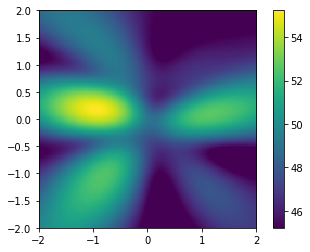

In [6]:
# 500 1000 2000
# 500 630 800 1000 1250 1600 2000 2500 3150 4000 5000 6300 8000 10000 12500 16000 20000

Frequenz = 800

pm = bb.synthetic(Frequenz, 0) # 0=Freq, 1=Okt, 3=Terz
Lm = acoular.L_p( pm )

plt.figure()
plt.imshow( Lm.T, 
            origin='lower', 
            vmin=Lm.max()-10, 
            extent=rg.extend(), 
            interpolation='nearest')  # bicubic vs nearest? -> bicubic beschoenigt
plt.colorbar()
#plt.savefig('Plots/%s_terz10000Hz'%ts.name[14:21], dpi = 300, format='png')
plt.show()

In [8]:
Lm.shape

(201, 201)

In [25]:
# Umgebung definieren (Medium, Strömung etc)
t = 23.6
e = acoular.Environment(c = 20.05*np.sqrt(273+t))

#Einlesen der Daten:
#ts = acoular.TimeSamples( name='Messungen WFS\msm_025.h5' )
ts = acoular.TimeSamples( name='Messungen_WFS/msm_004.h5' )


#Grid erstellen
rg = acoular.RectGrid3D(x_min=-2, x_max=2, 
                       y_min=0.2, y_max=0.2, 
                       z_min=1, z_max=5, 
                       increment=0.01)

#Steering Vector
st = acoular.SteeringVector( grid=rg, 
                             mics=mg, 
                             ref=1,     # Tipp von Gert, ref auf 1m, stimmt das so? Und wieso?
                             env = e,
                             steer_type = 'classic') # ???

#Spectrum erstellen:
ps = acoular.PowerSpectra( time_data=ts, 
                           block_size=128,
                           freq_range=[20, 5000],
                           window='Hanning' ) # Für bessere Auflösung hier Block_size erhöhen -> höherer Rechnenaufwand, daher jetzt erstmal mit 128


bb = acoular.BeamformerBase( freq_data=ps, 
                             steer=st )

[('msm_004_cache.h5', 10)]


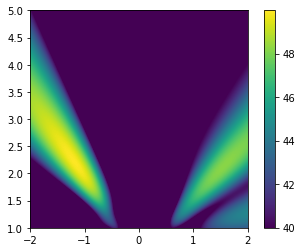

In [26]:
# 500 1000 2000
# 500 630 800 1000 1250 1600 2000 2500 3150 4000 5000 6300 8000 10000 12500 16000 20000

Frequenz = 2000

pm = bb.synthetic(Frequenz, 3) # 0=Freq, 1=Okt, 3=Terz
Lm2 = acoular.L_p( pm )
Lm2 = Lm2[:,0,:]
plt.figure()
plt.imshow( Lm2.T, 
            origin='lower', 
            vmin=Lm2.max()-10, 
            extent = (rg.x_min, rg.x_max, rg.z_min, rg.z_max),
            #extent=rg.extend(), 
            interpolation='bicubic')  # bicubic vs nearest? -> bicubic beschoenigt
plt.colorbar()
#plt.savefig('Plots/%s_terz10000Hz'%ts.name[14:21], dpi = 300, format='png')
plt.show()

In [27]:

'''
map_z = sum(pm,2)
map_y = sum(pm,1)
map_x = sum(pm,0)

plt.figure()
plt.imshow( map_x.T, 
            origin='lower', 
            vmin=Lm.max()-10, 
            extent=rg.extend(), 
            interpolation='bicubic')  # bicubic vs nearest?
plt.colorbar()
#plt.savefig('Plots/%s_okt_1600'%ts.name[14:21], dpi = 300, format='png')
plt.show()

'''

a = np.array([[0,1,2,3,4],[00,11,22,33,44]])
b = (a[:,4],a[:,2])


In [58]:
from acoular import __file__ as bpath, L_p, MicGeom, PowerSpectra,\
RectGrid3D, BeamformerBase, BeamformerCleansc, \
SteeringVector, WNoiseGenerator, PointSource, SourceMixer

from numpy import mgrid, arange, array, arccos, pi, cos, sin, sum
import mpl_toolkits.mplot3d
from pylab import figure, show, scatter, subplot, imshow, title, colorbar,\
xlabel, ylabel

#Spectrum erstellen:
ps_3D = acoular.PowerSpectra( time_data=ts,
                            overlap='50%', 
                           block_size=128,
                           freq_range=[250, 2500],
                           ind_low=5, ind_high=16,
                           window='Hanning' ) # Für bessere Auflösung hier Block_size erhöhen -> höherer Rechnenaufwand, daher jetzt erstmal mit 128



rg_3D = acoular.RectGrid3D(x_min=-3, x_max=3, 
                       y_min=-1, y_max=1, 
                       z_min=1, z_max=5, 
                       increment=0.1)

st_3D = acoular.SteeringVector(grid=rg_3D, mics=mg,
                             ref=1,     # Tipp von Gert, ref auf 1m, stimmt das so? Und wieso?
                             env = e, steer_type='true location') 

b_3D = acoular.BeamformerCleansc(freq_data=ps_3D, steer=st_3D)

[('msm_004_cache.h5', 24)]
[('msm_004_cache.h5', 25)]


<ipython-input-59-f463e70a2c83>:1: Warning: Beamforming result may not have been calculated for all queried frequencies. Check freq_data.ind_low and freq_data.ind_high!
  map = b_3D.synthetic(2000, 1)


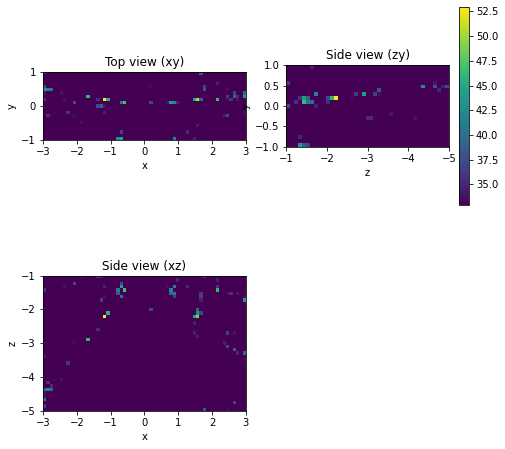

In [59]:
map = b_3D.synthetic(2000, 1)
fig=figure(1,(8,8))

subplot(221)
map_z = sum(map,2)
mx = L_p(map_z.max())
imshow(L_p(map_z.T), vmax=mx, vmin=mx-20, origin='lower', interpolation='nearest', 
       extent=(rg_3D.x_min, rg_3D.x_max, rg_3D.y_min, rg_3D.y_max))
xlabel('x')
ylabel('y')
title('Top view (xy)' )

subplot(223)
map_y = sum(map,1)
mx_xz = L_p(map_y.max())
imshow(L_p(map_y.T), vmax=mx_xz, vmin=mx_xz-20, origin='upper', interpolation='nearest', 
       extent=(rg_3D.x_min, rg_3D.x_max, -rg_3D.z_max, -rg_3D.z_min))
xlabel('x')
ylabel('z')
title('Side view (xz)' )

subplot(222)
map_x = sum(map,0)
mx_zy = L_p(map_x.max())
imshow(L_p(map_x), vmax=mx_zy, vmin=mx_zy-20, origin='lower', interpolation='nearest', 
       extent=(-rg_3D.z_min, -rg_3D.z_max,rg_3D.y_min, rg_3D.y_max))
xlabel('z')
ylabel('y')
title('Side view (zy)' )
colorbar()

In [67]:
ax0 = fig.add_subplot((224), projection='3d')
ax0.scatter(mg.mpos[0],mg.mpos[1],-mg.mpos[2])
#source_locs=array([p1.loc,p2.loc,p3.loc]).T
#ax0.scatter(source_locs[0],source_locs[1],-source_locs[2])
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_zlabel('z')
ax0.set_title('Setup (mic and source positions)')
#plt.show()

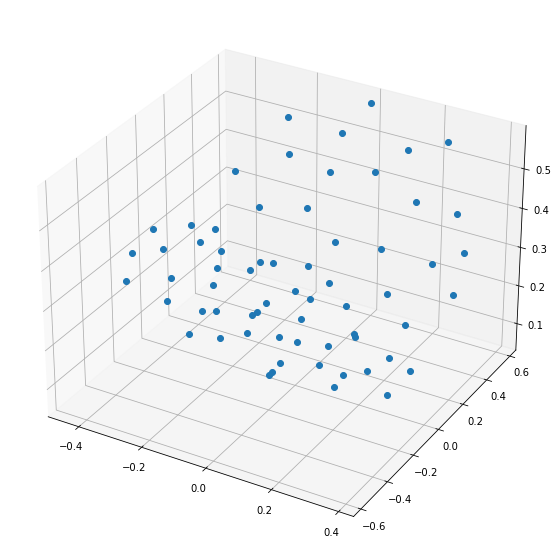

In [76]:
fig,ax = plt.subplots(1,1,figsize=(10,10),sharey=True)
ax = plt.axes(projection='3d')
ax.plot3D(mg.mpos[0], mg.mpos[1], mg.mpos[2], 'o')